In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('mlb_train.csv')

In [3]:
print(df.shape)
df.head()

(729, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


## Time-Series

In [15]:
time_df = df.loc[:,['attendance']]
print(time_df.shape)
time_df.head()

(729, 1)


,attendance
0,41245.00
1,38863.00
2,25982.00
3,28055.00
4,33044.00


In [44]:
time_df.mean()

attendance   29937.82
dtype: float64

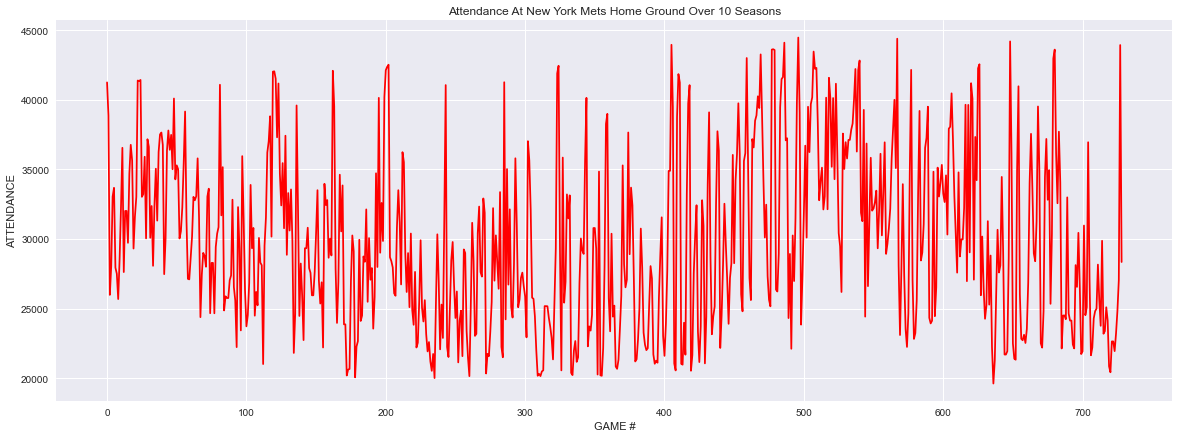

In [16]:
plt.figure(figsize=(20,7))
plt.plot(time_df.index, time_df, color = 'red')
plt.xlabel('GAME #')
plt.ylabel('ATTENDANCE')
plt.title('attendance at new york mets home ground over 10 seasons'.title())
plt.show()

In [43]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(time_df)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -6.30
p-value                         0.00
#Lags Used                      5.00
Number of Observations Used   723.00
dtype: float64


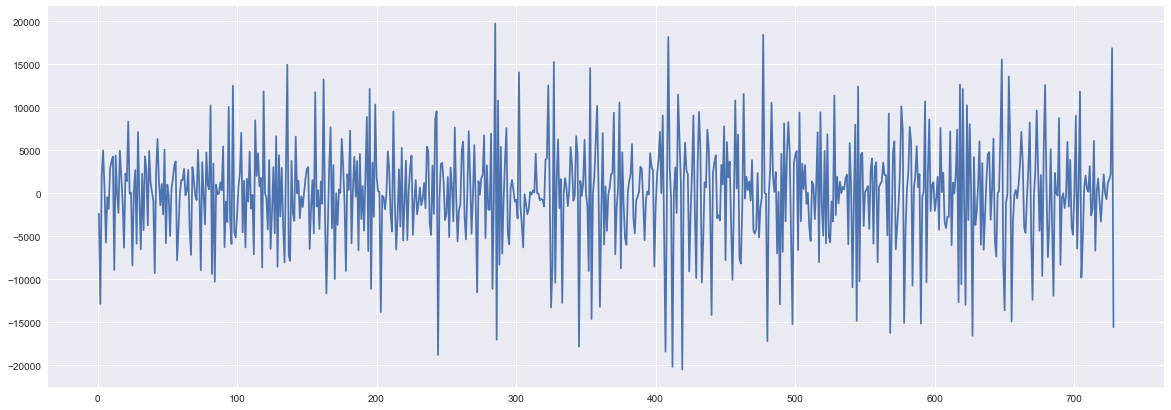

In [39]:
plt.figure(figsize=(20,7))
diff = time_df.diff()
plt.plot(diff)

In [40]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(diff[1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -10.08
p-value                         0.00
#Lags Used                     17.00
Number of Observations Used   710.00
dtype: float64


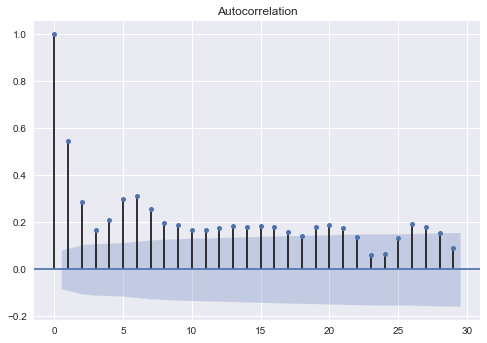

In [22]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(time_df, alpha=.025,); #plot autocorrelation for each lag (alpha is confidence interval)

<Figure size 1440x504 with 0 Axes>

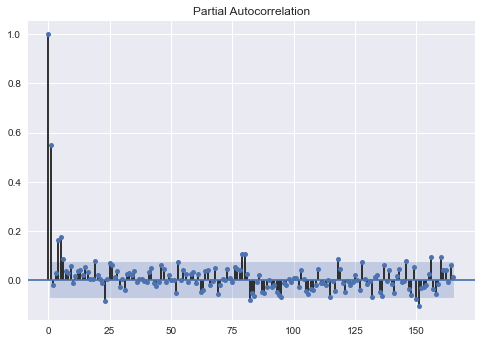

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plt.figure(figsize=(20,7))

plot_pacf(time_df, alpha=.05, lags=165);

In [62]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(time_df[:648], order=(3,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.attendance   No. Observations:                  647
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -6431.326
Method:                       css-mle   S.D. of innovations           5014.883
Date:                Sun, 01 Nov 2020   AIC                          12874.652
Time:                        23:55:06   BIC                          12901.486
Sample:                             1   HQIC                         12885.062
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.2660     23.382     -0.354      0.724     -54.094      37.562
ar.L1.D.attendance     0.4088      0.053      7.665      0.000       0.304       0.513
ar.L2.D.attendance  

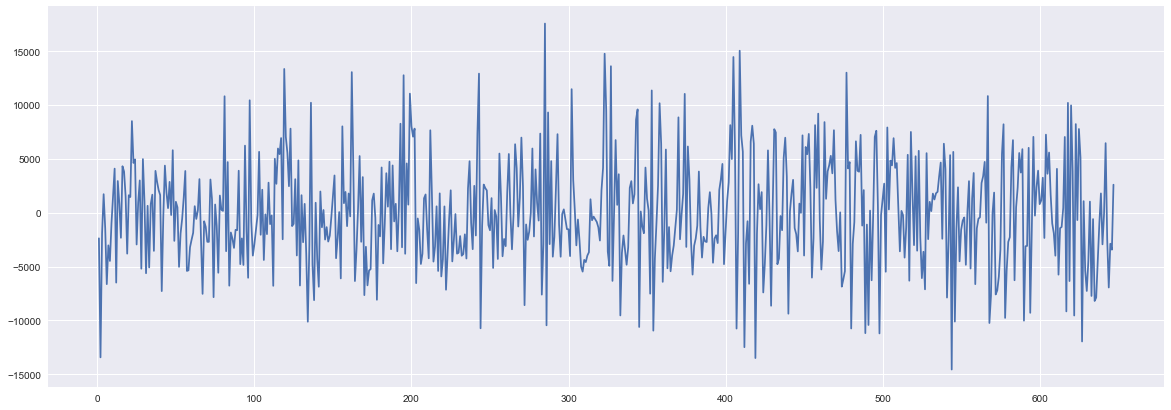

In [73]:
plt.figure(figsize=(20,7))

residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.show()

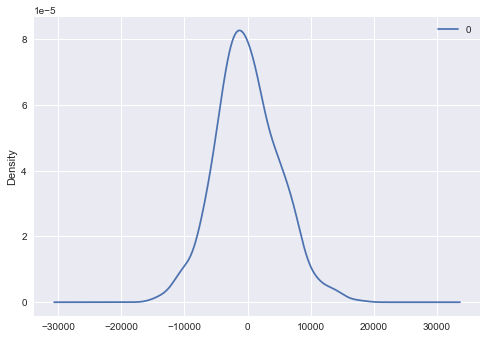

In [74]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.show()

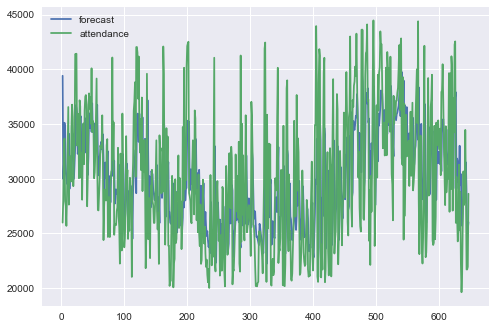

In [75]:
model_fit.plot_predict();

In [76]:
#forecasting the next periods
model_fit.forecast()

(array([28954.65215814]),
 array([5014.88262264]),
 array([[19125.66283107, 38783.6414852 ]]))